## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [55]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [56]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [57]:
df.shape

(294478, 5)

294478

c. The number of unique users in the dataset.

In [58]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [59]:
df['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [60]:
prop = 35237/(259241+35237)
print(prop)

0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [61]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape

(3893, 5)

3893

f. Do any of the rows have missing values?

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [63]:
df2 = df[((df.group == 'treatment') & (df.landing_page == 'new_page')) | ((df.group == 'control') & (df.landing_page == 'old_page'))]

In [64]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [65]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [66]:
df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

user id 773192

c. What is the row information for the repeat **user_id**? 

In [67]:
df3 = df2[df2.user_id == 773192]
df3.head()

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [68]:
df2 = df2.drop_duplicates(subset=['user_id'], keep = 'first')
df2.user_id.value_counts()

630732    1
793302    1
840399    1
797392    1
795345    1
801490    1
799443    1
787157    1
811737    1
836301    1
817882    1
815835    1
805596    1
803549    1
809694    1
807647    1
842446    1
838348    1
922263    1
828097    1
942745    1
936604    1
934557    1
940702    1
938655    1
830144    1
834242    1
848587    1
832195    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [69]:
df2.converted.value_counts()

0    255831
1     34753
Name: converted, dtype: int64

In [70]:
prop = (34753/290584)
print(prop)

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [72]:
cont = df2.query('group == "control"')
cont_diff = cont.query('converted == "1"').count()[0]/cont.query('group == "control"').count()[0]
cont_diff

0.1203863045004612

In [73]:
cont1 = (17489/290584)
print(cont1)

0.06018569501417834


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [74]:
treat = df2.query('group == "treatment"')
treat_diff = treat.query('converted == "1"').count()[0]/treat.query('group == "treatment"').count()[0]
treat_diff

0.11880806551510564

d. What is the probability that an individual received the new page?

In [75]:
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [76]:
npage = (145310/290584)
print(npage)

0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The control group received the old page of the website and the conversion rate is .0602.  The treatment group received the new page and the conversion rate is .1188.  The treatment group probability was almost twice that of the control group so tehre is merit in teh possibility that the new page is creating more conversions than the old page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis (H0)  - The conversion rate for the new page will equal to the conversion rate of the old page. (It could also be less than the old page but the questions following seem to lean towards just having a null hypothesis of teh convert rates will be equal, regardless of page type).

Alternative Hypothesis (H1) - The conversion rate for the new page will be different than the conversion rate for the old page with a confidence level of 5%. (Not sure if that difference will be significant or not.  If we are adding in the less than or equal to part to the Null hypothesis, then the alternative hypothesis would be that the conversiona  ate for the new woudl be greater than the old page.)


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [77]:
#create a dataframe of only new_page rows
newp = df2.query('landing_page == "new_page"')

In [78]:
newp1 = newp.converted.mean()
newp1

0.11880806551510564

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [79]:
#create a dataframe of only new_page rows
oldp = df2.query('landing_page == "old_page"')

In [80]:
oldp1 = oldp.converted.mean()
oldp1
#control_ctr = oldp.query('converted == 1') / oldp.query('converted == 0')
#control_ctr

0.1203863045004612

In [81]:
#combined mean of both
both1 = np.mean([newp1, oldp1])
both1

0.11959718500778342

0.119597 would be the same p value for both p(new) and p(old) given the null hypothesis that there is no difference between the two pages so the convert rates should be the same.

c. What is $n_{new}$?

In [82]:
newp.shape

(145310, 5)

145310

d. What is $n_{old}$?

In [83]:
oldp.shape

(145274, 5)

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [84]:
new_page_converted =np.random.binomial(1, .1196, 145310)
print(new_page_converted)

[1 0 0 ..., 0 0 0]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [85]:
old_page_converted =np.random.binomial(1, .1196, 145274)

In [86]:
print(old_page_converted)

[0 0 0 ..., 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [87]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
print(p_diff)

-2.26569078983e-05


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [88]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [89]:
#new_page_converted = np.random.binomial(145310, .1188)
#print(new_page_converted)

In [90]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(145310, .1188)
    old_page_converted = np.random.binomial(145274, .1204)
    #diff = np.mean(new_page_converted) - np.mean(old_page_converted)
    diff = (new_page_converted/145310) - (old_page_converted/145274)
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [91]:
#define the confidence levels
low, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

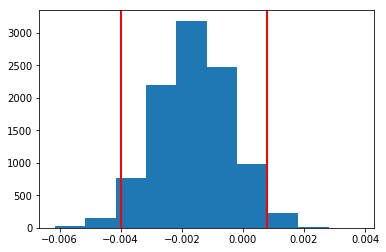

In [92]:
#plot the result
plt.hist(p_diffs);
plt.axvline(x=low, color = 'r', linewidth=2);
plt.axvline(x=upper, color = 'r', linewidth=2);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [93]:
import statsmodels.api as sm

convert_old = .1204
convert_new = .1188
n_old = 145274
n_new = 145310
exp_conv_old = (n_old * convert_old)
exp_conv_new = (n_new * convert_new)
#print(exp_conv_new)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [94]:
z_score, p_value = sm.stats.proportions_ztest([17491, 17263], [145274, 145310])
print(z_score, p_value)

1.32805919493 0.184158552262


In [95]:
from scipy.stats import norm

norm.cdf(z_score)
# Tells us how significant our z-score is

0.90792072386887768

In [96]:
norm.ppf(1-(0.05/2))
# Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Simple Linear Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [97]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [98]:
#import statsmodels.api as sm
df['intercept'] = 1
df[['treatment', 'ab_page']] = pd.get_dummies(df['group'])
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [101]:
import statsmodels.api as sm
df['intercept'] = 1
lm = sm.OLS(df['converted'], df[['intercept', 'ab_page']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.530
Date:                Tue, 19 Jun 2018   Prob (F-statistic):              0.216
Time:                        22:20:30   Log-Likelihood:                -86476.
No. Observations:              294478   AIC:                         1.730e+05
Df Residuals:                  294476   BIC:                         1.730e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    142.325      0.000       0.119       0.122
ab_page       -0.0015      0.001     -1.237      0.216      -0.004       0.001
==============================================================================
Omnibus:                   127167.100   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           419292.014
Skew:                           2.344   Prob(JB):                         0.00
Kurtosis:                       6.493   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p value of the ab_page is .216.

H(null) - In a simple linear model the population slope of the x variable landing page) and the y variable (converted) is equal to zero.
H(alternative) - In a simple linear model the population slope of the x variable landing page) and the y variable (converted) is not equal to zero.

The previous null hypothesis is just looking at whether two scenarios would be the same or not.  With a simple linear regression model we can ask what type of relationship there is between the x and y variables ( a positive relationship, a negative relationship, or no significant relationship).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

By adding in addditional factors to consider we might find that the new factors provide a greater correlation with data than whaat we started with.  We might not have taken that into consideration when formualting the initial null hypothesis.  the downside would be the possibility of everyting becoming significantly different, or the opposite, if we do not take into consideration the possible interactions between the new factors with each other (multi-collinearity). Another concern could be the introduction of outliers with teh new data, which could skew the results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [104]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [115]:
countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [116]:
#join_df = df.join(countries)
df.join(countries, on='user_id', how='left', lsuffix='_left', rsuffix='_right')
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [118]:
df[['CA', 'UK', 'US']] = pd.get_dummies(df['country'])

KeyError: 'country'

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])